# Coursework

Initialising the imports and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.feature

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from  sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
trn_img = np.load('trnImage.npy')
trn_label_coarse = np.load('trnLabel_coarse.npy')
trn_label_fine = np.load('trnLabel_fine.npy')

tst_img = np.load('tstImage.npy')
tst_label_coarse = np.load('tstLabel_coarse.npy')
tst_label_fine = np.load('tstLabel_fine.npy')

# Turning the labels into one list
fine_label = pd.read_csv('fine_labels.csv')
fine_label = list(fine_label.columns)

coarse_label = pd.read_csv('coarse_labels.csv')
coarse_label = list(coarse_label.columns)

Examining elements of the CIFAR 100 dataset

In [3]:
trn_img.shape

train_image1 = trn_img[:, :, :, 0]
print('Training Image:', train_image1.shape)
print('Training Label - Coarse:', trn_label_coarse.shape[0])
print('Training Label - Fine:', trn_label_fine[0])

test_image1 = tst_img[:, :, :, 0]
print('Testing Image:', test_image1.shape)
print('Testing Label - Coarse:', tst_label_coarse.shape[0])
print('Testing Label - Fine:', tst_label_fine.shape[0])

Training Image: (32, 32, 3)
Training Label - Coarse: 50000
Training Label - Fine: 19
Testing Image: (32, 32, 3)
Testing Label - Coarse: 10000
Testing Label - Fine: 10000


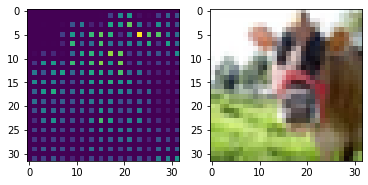

In [4]:
hog_feature, hog_image = skimage.feature.hog(train_image1, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True, channel_axis=2)

plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(train_image1)
plt.show()

# Convolutional Neural Network

In [5]:
trn_img = np.transpose(trn_img, [3,0,1,2])
tst_img = np.transpose(tst_img, [3,0,1,2])

trn_img = trn_img.astype('float32')
tst_img = tst_img.astype('float32')

trn_img = (trn_img - np.min(trn_img)) / (np.max(trn_img) - np.min(trn_img))
tst_img = (tst_img - np.min(tst_img)) / (np.max(tst_img) - np.min(tst_img))

The commonly used **Dense** function works as a layer of neurons, of size *n*, they are used to calculate a score that is outputted on the final layer.
<br/>
The **compile** contents are a requirement for the **Sequential** function to work.

## Superset Classification
Model and training for coarse labels

In [6]:
model = keras.Sequential(layers=[
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [7]:
history = model.fit(trn_img, trn_label_coarse, epochs=20, validation_split=0.2, batch_size=50)
predict = model.predict(tst_img)

tst_loss, tst_acc = model.evaluate(tst_img, tst_label_coarse)

Epoch 1/50
800/800 [==============================] - 13s 4ms/step - loss: 2.5488 - accuracy: 0.2090 - val_loss: 2.2855 - val_accuracy: 0.2955
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 2.2067 - accuracy: 0.3161 - val_loss: 2.1119 - val_accuracy: 0.3389
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 2.0411 - accuracy: 0.3638 - val_loss: 1.9502 - val_accuracy: 0.3966
Epoch 4/50
800/800 [==============================] - 3s 3ms/step - loss: 1.9292 - accuracy: 0.3973 - val_loss: 1.8599 - val_accuracy: 0.4267
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 1.8383 - accuracy: 0.4265 - val_loss: 1.7647 - val_accuracy: 0.4461
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 1.7665 - accuracy: 0.4472 - val_loss: 1.7123 - val_accuracy: 0.4695
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 1.7041 - accuracy: 0.4641 - val_loss: 1.6882 - val_accuracy: 0.4777
Epoch

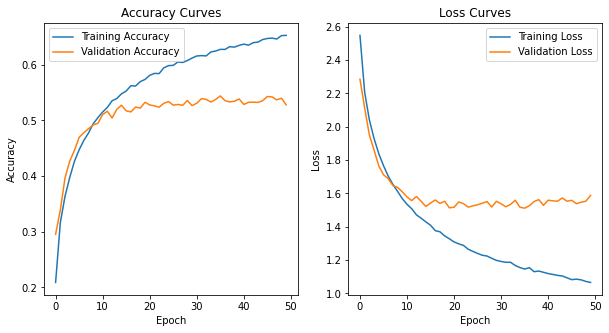

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

This difference between the training and validation accuracy is likely due to overfitting.

### Confusion Matrix

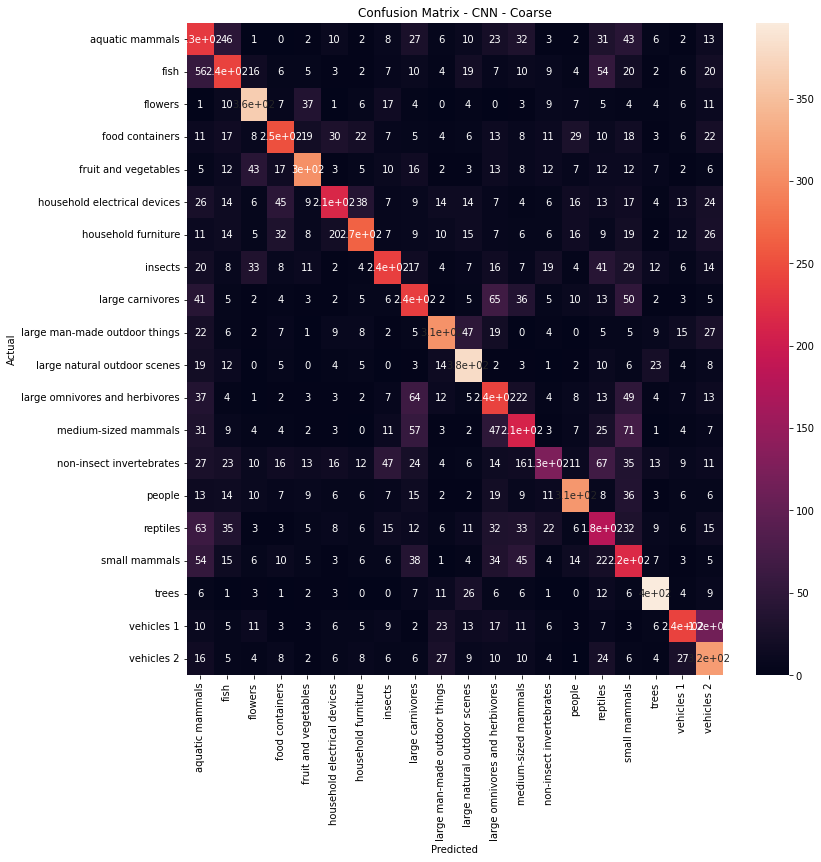

In [9]:
predict = predict.argmax(1)
cm_coarse = confusion_matrix(tst_label_coarse, predict)
plt.figure(figsize=(12,12))
sns.heatmap(cm_coarse, annot=True,  xticklabels=coarse_label, yticklabels=coarse_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN - Coarse')
plt.show()

### Classification Report

In [10]:
report_coarse = classification_report(tst_label_coarse, predict, target_names=coarse_label)
print(report_coarse)

                                precision    recall  f1-score   support

               aquatic mammals       0.33      0.47      0.39       500
                          fish       0.48      0.48      0.48       500
                       flowers       0.68      0.73      0.71       500
               food containers       0.58      0.50      0.54       500
          fruit and vegetables       0.69      0.61      0.65       500
  household electrical devices       0.61      0.43      0.50       500
           household furniture       0.65      0.53      0.59       500
                       insects       0.57      0.48      0.52       500
              large carnivores       0.42      0.47      0.44       500
 large man-made outdoor things       0.67      0.61      0.64       500
  large natural outdoor scenes       0.65      0.76      0.70       500
large omnivores and herbivores       0.41      0.48      0.44       500
          medium-sized mammals       0.44      0.42      0.43  

## Subset Classification
Model and training for fine labels

In [27]:
trn_img = np.load('trnImage.npy')
tst_img = np.load('tstImage.npy')

trn_label_fine = np.load('trnLabel_fine.npy')
tst_label_fine = np.load('tstLabel_fine.npy')

In [28]:
trn_img = np.transpose(trn_img, [3,0,1,2])
tst_img = np.transpose(tst_img, [3,0,1,2])

trn_img = trn_img.astype('float32')
tst_img = tst_img.astype('float32')

trn_img = (trn_img - np.min(trn_img)) / (np.max(trn_img) - np.min(trn_img))
tst_img = (tst_img - np.min(tst_img)) / (np.max(tst_img) - np.min(tst_img))

We use a *softmax* layer with 100 neurons because we have 100 elements in the fine labels.

In [29]:
model = keras.Sequential(layers=[
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)         

In [30]:
history = model.fit(trn_img, trn_label_fine, epochs=25, validation_split=0.2, batch_size=50)
predict = model.predict(tst_img)

tst_loss, tst_acc = model.evaluate(tst_img, tst_label_fine)

Epoch 1/25
800/800 [==============================] - 3s 3ms/step - loss: 4.0665 - accuracy: 0.0759 - val_loss: 3.6328 - val_accuracy: 0.1450
Epoch 2/25
800/800 [==============================] - 3s 3ms/step - loss: 3.4787 - accuracy: 0.1671 - val_loss: 3.2919 - val_accuracy: 0.2039
Epoch 3/25
800/800 [==============================] - 3s 3ms/step - loss: 3.2039 - accuracy: 0.2165 - val_loss: 3.0814 - val_accuracy: 0.2462
Epoch 4/25
800/800 [==============================] - 3s 3ms/step - loss: 3.0337 - accuracy: 0.2511 - val_loss: 3.0251 - val_accuracy: 0.2595
Epoch 5/25
800/800 [==============================] - 3s 3ms/step - loss: 2.8973 - accuracy: 0.2765 - val_loss: 2.8519 - val_accuracy: 0.2859
Epoch 6/25
800/800 [==============================] - 2s 3ms/step - loss: 2.7815 - accuracy: 0.3007 - val_loss: 2.7685 - val_accuracy: 0.3003
Epoch 7/25
800/800 [==============================] - 2s 3ms/step - loss: 2.6896 - accuracy: 0.3184 - val_loss: 2.7034 - val_accuracy: 0.3165
Epoch 

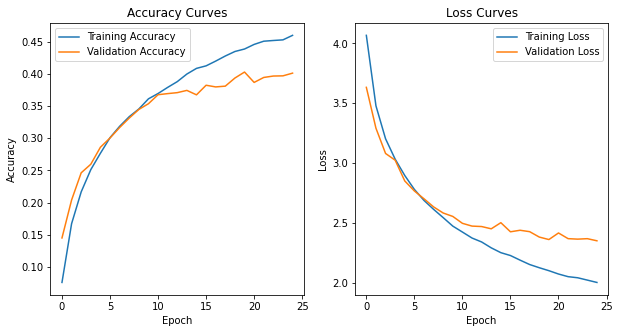

In [31]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Confusion Matrix

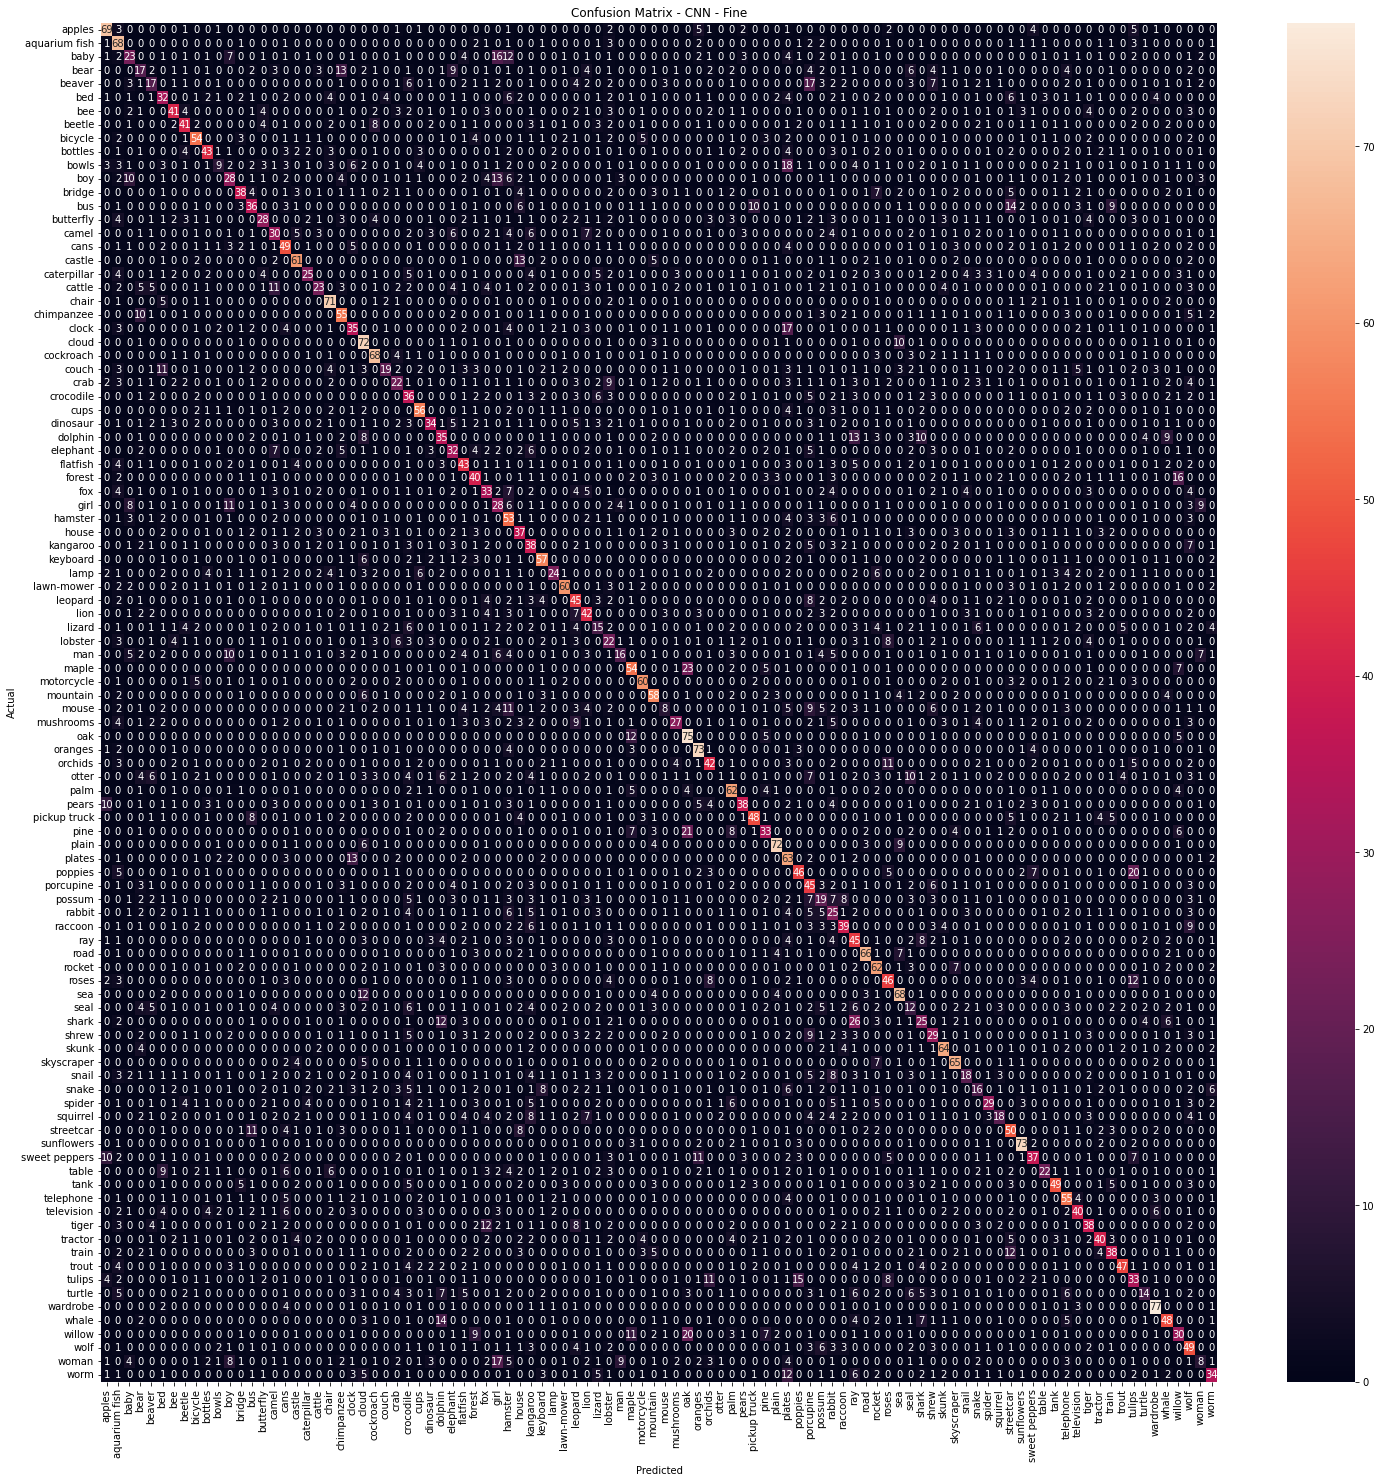

In [32]:
pred_fine = predict.argmax(1)
cm_fine = confusion_matrix(tst_label_fine, pred_fine)
plt.figure(figsize=(25,25))
sns.heatmap(cm_fine, annot=True,  xticklabels=fine_label, yticklabels=fine_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN - Fine')
plt.show()

### Classification Report

In [33]:
report_fine = classification_report(tst_label_fine, pred_fine, target_names=fine_label)
print(report_fine)

               precision    recall  f1-score   support

       apples       0.63      0.69      0.66       100
aquarium fish       0.38      0.68      0.48       100
         baby       0.32      0.23      0.27       100
         bear       0.20      0.17      0.18       100
       beaver       0.25      0.17      0.20       100
          bed       0.30      0.32      0.31       100
          bee       0.47      0.41      0.44       100
       beetle       0.52      0.41      0.46       100
      bicycle       0.52      0.54      0.53       100
      bottles       0.51      0.43      0.47       100
        bowls       0.28      0.09      0.14       100
          boy       0.30      0.28      0.29       100
       bridge       0.51      0.38      0.44       100
          bus       0.35      0.36      0.35       100
    butterfly       0.38      0.28      0.32       100
        camel       0.31      0.30      0.31       100
         cans       0.37      0.49      0.42       100
       ca

# Support Vector Machine Model

Resetting the datasets

In [18]:
trn_img = np.load('trnImage.npy')
tst_img = np.load('tstImage.npy')

In [19]:
trn_img = np.transpose(trn_img, [3,0,1,2])
tst_img = np.transpose(tst_img, [3,0,1,2])

trn_img = trn_img.astype('float32')
tst_img = tst_img.astype('float32')

trn_img = (trn_img - np.min(trn_img)) / (np.max(trn_img) - np.min(trn_img))
tst_img = (tst_img - np.min(tst_img)) / (np.max(tst_img) - np.min(tst_img))

We flatten the training and testing datasets to 2 dimensions to work with the SVM.
Extracting the hog features

In [20]:
trn_hog = []
tst_hog = []

for i in range(len(trn_img)):
    hog_feature, hog_image = skimage.feature.hog(trn_img[i], pixels_per_cell=[6,6], cells_per_block=[3,3], visualize=True, channel_axis=2)
    trn_hog.append(hog_feature)

for i in range(len(tst_img)):
    hog_feature, hog_image = skimage.feature.hog(tst_img[i], pixels_per_cell=[6,6], cells_per_block=[3,3], visualize=True, channel_axis=2)
    tst_hog.append(hog_feature)

## Coarse Model

In [21]:
svm = SVC(C=1.0, kernel='linear', gamma='auto')

trn_fit = svm.fit(trn_hog, trn_label_coarse)
predict = svm.predict(tst_hog)

### Confusion Matrix

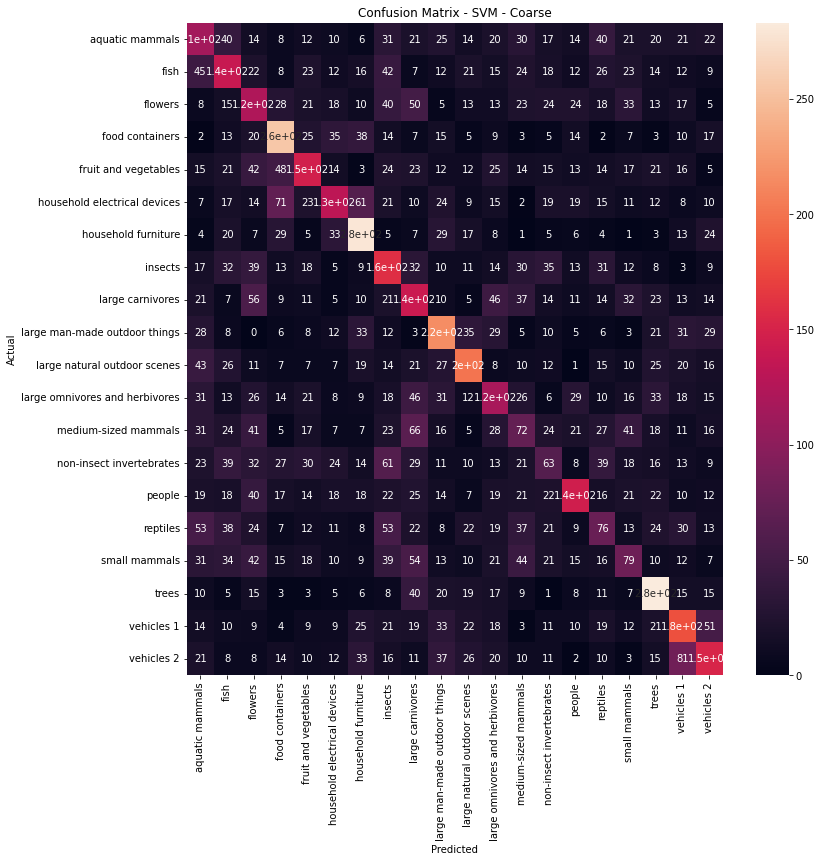

In [22]:
cm_coarse = confusion_matrix(tst_label_coarse, predict)
plt.figure(figsize=(12,12))
sns.heatmap(cm_coarse, annot=True,  xticklabels=coarse_label, yticklabels=coarse_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Coarse')
plt.show()

### Classification Report

In [23]:
report_coarse = classification_report(tst_label_coarse, predict, target_names=coarse_label)
print(report_coarse)

                                precision    recall  f1-score   support

               aquatic mammals       0.21      0.23      0.22       500
                          fish       0.26      0.28      0.27       500
                       flowers       0.21      0.24      0.23       500
               food containers       0.43      0.51      0.47       500
          fruit and vegetables       0.34      0.29      0.31       500
  household electrical devices       0.34      0.26      0.30       500
           household furniture       0.46      0.56      0.50       500
                       insects       0.25      0.32      0.28       500
              large carnivores       0.22      0.28      0.25       500
 large man-made outdoor things       0.38      0.43      0.40       500
  large natural outdoor scenes       0.42      0.40      0.41       500
large omnivores and herbivores       0.25      0.24      0.24       500
          medium-sized mammals       0.17      0.14      0.16  

## Fine Model

In [24]:
svm = SVC(C=1.0, kernel='linear', gamma='auto')

trn_fit = svm.fit(trn_hog, trn_label_fine)
predict = svm.predict(tst_hog)

### Confusion Matrix

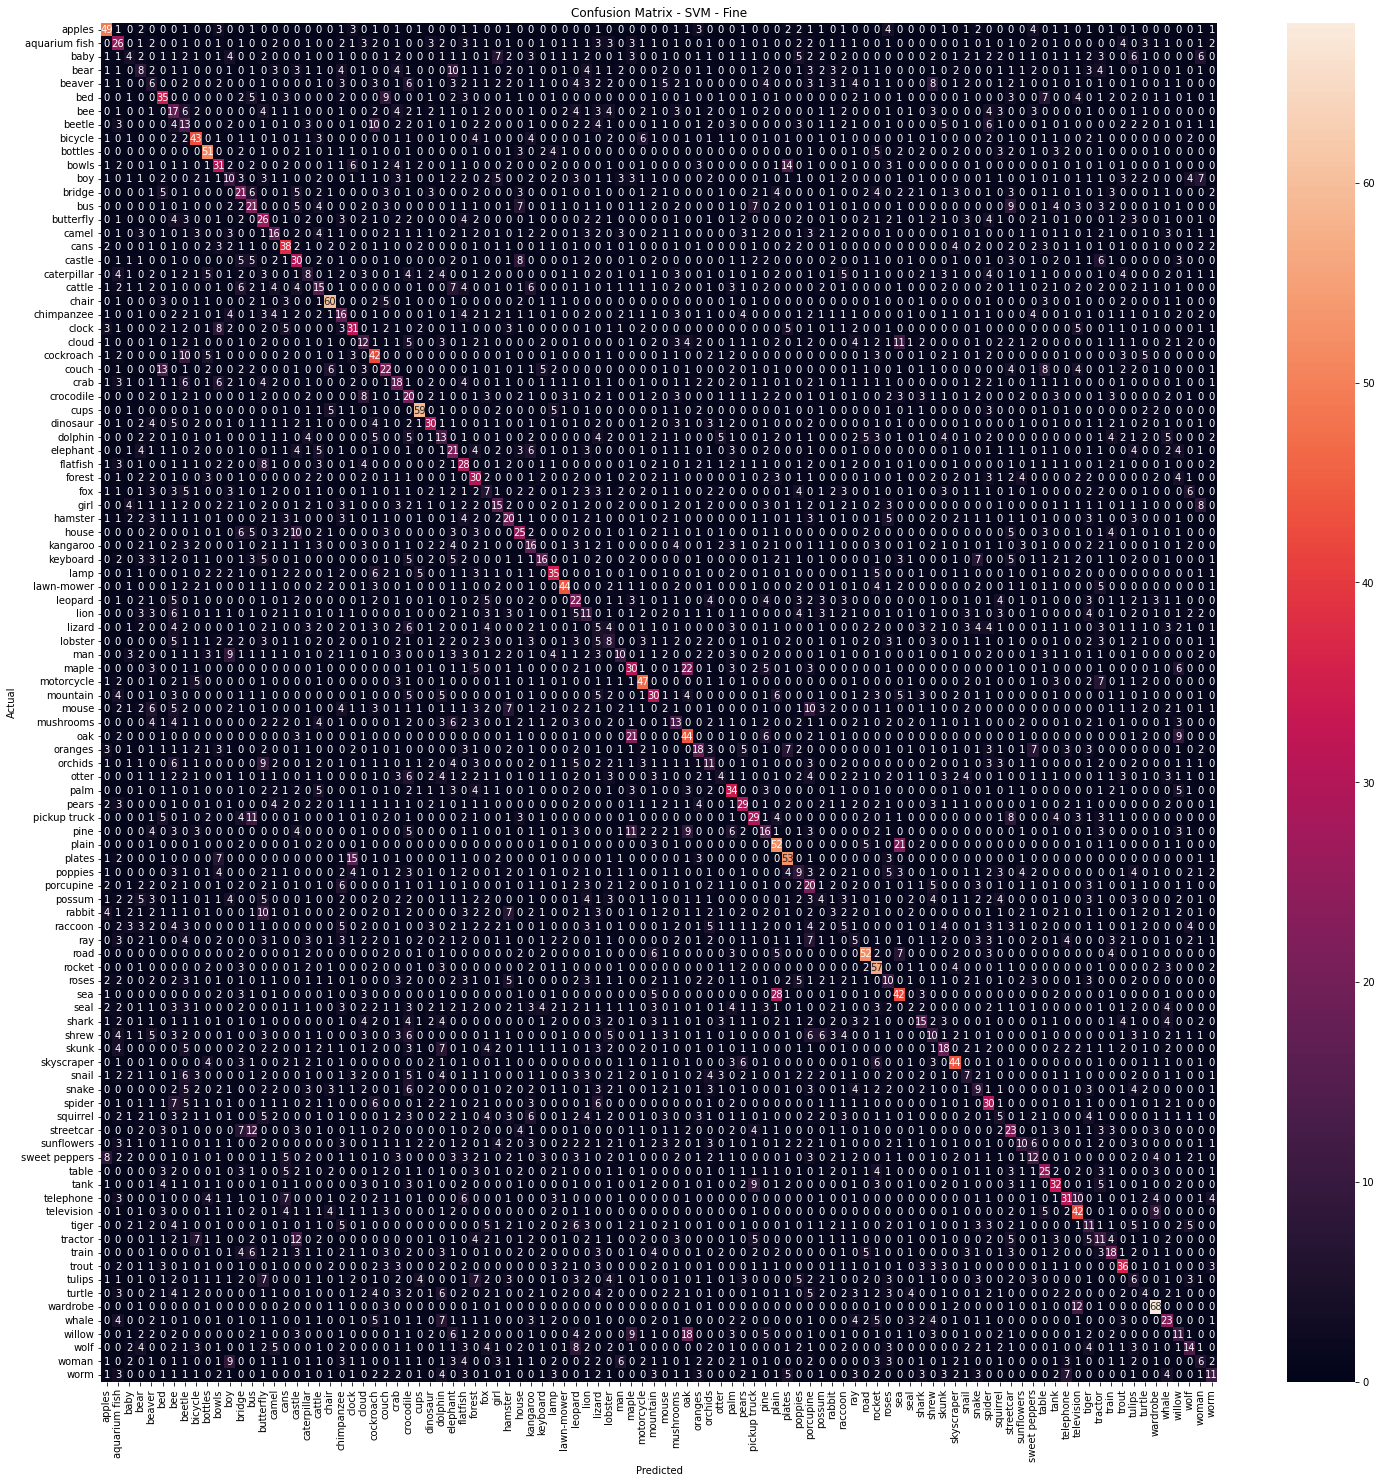

In [25]:
cm_fine = confusion_matrix(tst_label_fine, predict)
plt.figure(figsize=(25,25))
sns.heatmap(cm_fine, annot=True,  xticklabels=fine_label, yticklabels=fine_label)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM - Fine')
plt.show()

### Classification Report

In [26]:
report_coarse = classification_report(tst_label_fine, predict, target_names=fine_label)
print(report_coarse)

               precision    recall  f1-score   support

       apples       0.48      0.49      0.48       100
aquarium fish       0.20      0.26      0.23       100
         baby       0.08      0.04      0.05       100
         bear       0.09      0.08      0.08       100
       beaver       0.06      0.06      0.06       100
          bed       0.34      0.35      0.34       100
          bee       0.10      0.17      0.13       100
       beetle       0.09      0.13      0.11       100
      bicycle       0.37      0.43      0.40       100
      bottles       0.47      0.51      0.49       100
        bowls       0.28      0.31      0.29       100
          boy       0.12      0.10      0.11       100
       bridge       0.18      0.21      0.19       100
          bus       0.20      0.21      0.20       100
    butterfly       0.15      0.26      0.19       100
        camel       0.18      0.16      0.17       100
         cans       0.34      0.38      0.36       100
       ca